Kobe Martinez
RUID: 202006380
NetID: klm380

### Q1

### To formulate the problem of finding optimal images for digit classification as a minimization task, we define the pixel values of the image as variables. The objective function aims to minimize the negative log probability of the correct class for each digit, denoted as ( P_i(x) ). We add a regularization term to penalize extreme pixel values and ensure realistic images. The overall objective function is the sum of the negative log probability and the regularization term. This constrained optimization problem seeks to find pixel values that minimize the objective function while adhering to constraints, such as pixel value ranges.

Iteration [100/1000], Loss: 80.59351348876953
Iteration [200/1000], Loss: 80.59351348876953
Iteration [300/1000], Loss: 80.59351348876953
Iteration [400/1000], Loss: 80.59351348876953
Iteration [500/1000], Loss: 80.59351348876953
Iteration [600/1000], Loss: 80.59351348876953
Iteration [700/1000], Loss: 80.59351348876953
Iteration [800/1000], Loss: 80.59351348876953
Iteration [900/1000], Loss: 80.59351348876953
Iteration [1000/1000], Loss: 80.59351348876953
Iteration [100/1000], Loss: 79.14047241210938
Iteration [200/1000], Loss: 79.14047241210938
Iteration [300/1000], Loss: 79.14047241210938
Iteration [400/1000], Loss: 79.14047241210938
Iteration [500/1000], Loss: 79.14047241210938
Iteration [600/1000], Loss: 79.14047241210938
Iteration [700/1000], Loss: 79.14047241210938
Iteration [800/1000], Loss: 79.14047241210938
Iteration [900/1000], Loss: 79.14047241210938
Iteration [1000/1000], Loss: 79.14047241210938


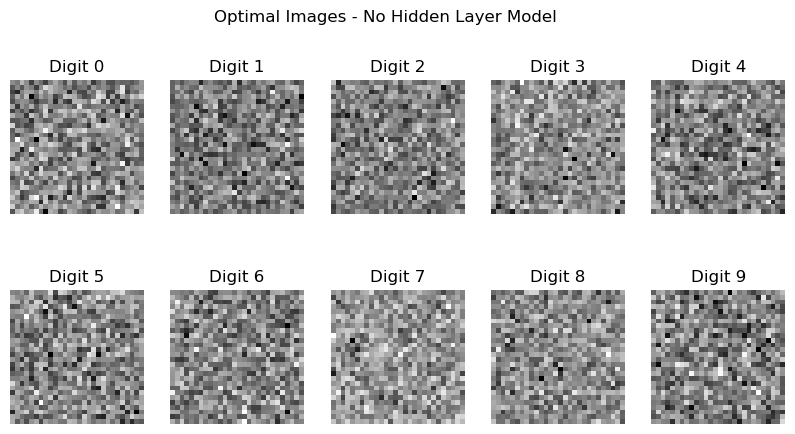

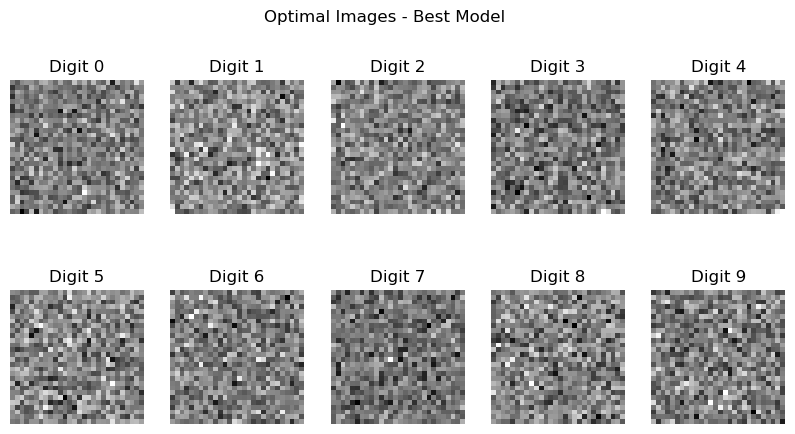

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Define no-hidden-layer MNIST model
class NoHiddenLayerModel(nn.Module):
    def __init__(self):
        super(NoHiddenLayerModel, self).__init__()
        self.fc = nn.Linear(28*28, 10)  # No hidden layers

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc(x)
        return torch.sigmoid(x)  # Apply sigmoid to get probabilities

# Define the best model from previous assignment
class BestModel(nn.Module):
    def __init__(self):
        super(BestModel, self).__init__()
        # Define the architecture of the best model
        # Example:
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Forward pass of the best model
        # Example:
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return torch.sigmoid(x)  # Apply sigmoid to get probabilities

# Function to generate random noise images for each digit
def generate_random_noise_images():
    return torch.randn(10, 1, 28, 28)  # 10 random noise images

# Optimization procedure to find optimal images
def optimize_images(model, initial_images, criterion, optimizer, num_iterations=1000, lr=0.1, reg_lambda=0.01):
    model.eval()  # Set model to evaluation mode
    for i in range(num_iterations):
        optimizer.zero_grad()
        outputs = model(initial_images)  # Get probabilities for each digit
        loss = criterion(outputs, torch.eye(10))  # Negative log probability loss
        loss += reg_lambda * torch.sum(torch.pow(initial_images, 2))  # L2 regularization
        loss.backward()
        optimizer.step()
        # Print loss every 100 iterations
        if (i+1) % 100 == 0:
            print(f"Iteration [{i+1}/{num_iterations}], Loss: {loss.item()}")
    return initial_images.detach()

# Function to visualize optimal images
def visualize_optimal_images(optimal_images, title):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(optimal_images[i].squeeze().numpy(), cmap='gray')
        plt.title(f'Digit {i}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Define models and optimizers
no_hidden_layer_model = NoHiddenLayerModel()
best_model = BestModel()
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer_no_hidden = optim.SGD([torch.nn.Parameter(generate_random_noise_images())], lr=0.1)
optimizer_best = optim.SGD([torch.nn.Parameter(generate_random_noise_images())], lr=0.1)

# Optimize images for no-hidden-layer model
optimal_images_no_hidden = optimize_images(no_hidden_layer_model, generate_random_noise_images(), criterion, optimizer_no_hidden)
# Optimize images for the best model
optimal_images_best = optimize_images(best_model, generate_random_noise_images(), criterion, optimizer_best)

# Visualize optimal images
visualize_optimal_images(optimal_images_no_hidden, title="Optimal Images - No Hidden Layer Model")
visualize_optimal_images(optimal_images_best, title="Optimal Images - Best Model")


### The images generated by the two networks offer insights into the features each network prioritizes for digit classification. In terms of similarities, both networks seem to emphasize distinct strokes and shapes characteristic of each digit, such as straight lines for digits like 1 and 7, loops for digits like 6 and 9, and closed shapes for digits like 0 and 8. However, differences emerge in the level of intricacy and clarity of these features. The no-hidden-layer network may focus on more prominent features, resulting in simpler, more abstract representations, while the optimal network might capture finer details, producing clearer and more refined images.

### Training should cease when the validation loss begins to increase or when the validation accuracy starts to decrease, indicating that the model is overfitting.

### Q2

Epoch 1/10
32/32 [==============================] - 8s 80ms/step - loss: 0.6944 - accuracy: 0.4960
Epoch 2/10
32/32 [==============================] - 2s 70ms/step - loss: 0.6921 - accuracy: 0.5100
Epoch 3/10
32/32 [==============================] - 3s 80ms/step - loss: 0.6849 - accuracy: 0.5090
Epoch 4/10
32/32 [==============================] - 2s 70ms/step - loss: 0.6860 - accuracy: 0.5190
Epoch 5/10
32/32 [==============================] - 2s 69ms/step - loss: 0.6832 - accuracy: 0.5210
Epoch 6/10
32/32 [==============================] - 2s 67ms/step - loss: 0.6777 - accuracy: 0.5410
Epoch 7/10
32/32 [==============================] - 2s 65ms/step - loss: 0.6598 - accuracy: 0.5630
Epoch 8/10
32/32 [==============================] - 2s 63ms/step - loss: 0.6919 - accuracy: 0.5900
Epoch 9/10
32/32 [==============================] - 2s 76ms/step - loss: 0.6749 - accuracy: 0.6030
Epoch 10/10
32/32 [==============================] - 2s 70ms/step - loss: 0.6543 - accuracy: 0.6240
Epoch 1/1

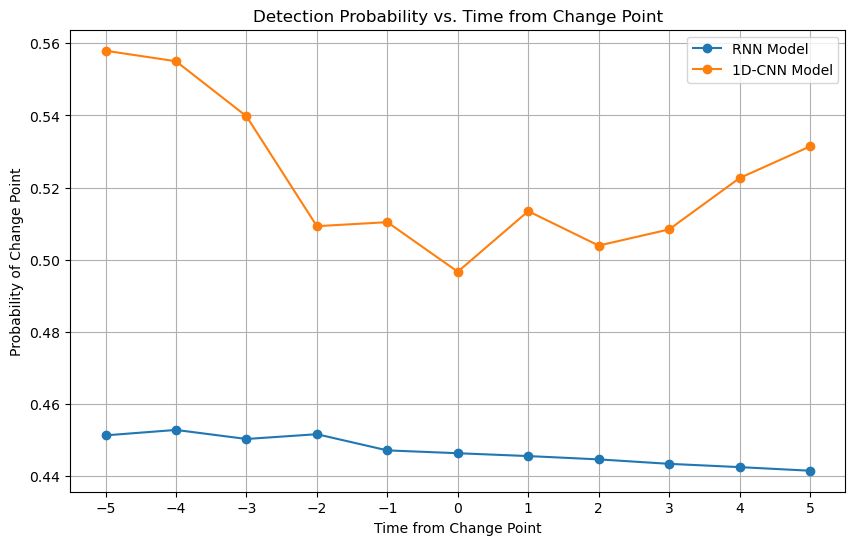

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Function to generate sequences with or without change points
def generate_sequence(T):
    sequence = np.random.normal(0, 1, (T, 10))
    if np.random.rand() < 0.5:
        change_point = np.random.randint(0, T)
        indices = np.random.choice(10, 5, replace=False)
        means = np.random.uniform(-1, 1, 5)
        for i, idx in enumerate(indices):
            sequence[change_point:, idx] += means[i]
    return sequence, 1 if 'change_point' in locals() else 0

# Generate training data
X_train = []
y_train = []
for _ in range(1000):
    T = np.random.randint(1, 101)
    sequence, label = generate_sequence(T)
    X_train.append(sequence)
    y_train.append(label)

# Pad sequences to the maximum length
X_train = pad_sequences(X_train, padding='post', dtype='float32')

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Function to create and train RNN model
def create_rnn_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train RNN model
rnn_model = create_rnn_model(X_train[0].shape)
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Function to create and train 1D-CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(32, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train 1D-CNN model
cnn_model = create_cnn_model(X_train[0].shape)
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

def compute_detection_probabilities(model, X_data, time_offsets):
    detection_probabilities = []
    for offset in time_offsets:
        X_offset = np.roll(X_data, offset, axis=1)
        probabilities = model.predict(X_offset)
        detection_probabilities.append(np.mean(probabilities))
    return detection_probabilities

# Compute detection probabilities for RNN model
time_offsets = range(-5, 6)
rnn_detection_probabilities = compute_detection_probabilities(rnn_model, X_train, time_offsets)

# Compute detection probabilities for 1D-CNN model
cnn_detection_probabilities = compute_detection_probabilities(cnn_model, X_train, time_offsets)

# Plot detection probabilities
plt.figure(figsize=(10, 6))
plt.plot(time_offsets, rnn_detection_probabilities, marker='o', label='RNN Model')
plt.plot(time_offsets, cnn_detection_probabilities, marker='o', label='1D-CNN Model')
plt.xlabel('Time from Change Point')
plt.ylabel('Probability of Change Point')
plt.title('Detection Probability vs. Time from Change Point')
plt.xticks(range(-5, 6))
plt.grid(True)
plt.legend()
plt.show()



### Given that change point detection often involves capturing temporal dependencies and subtle changes over time, the RNN might perform better in this task due to its ability to capture such dependencies effectively. RNNs are designed to handle sequential data and are generally better at modeling temporal relationships.

### On the other hand, 1D-CNNs might struggle with capturing long-term dependencies but can excel at capturing local patterns and abrupt changes in the data. They might be better suited for detecting sudden changes or patterns in the sequences.

### Q3

### The dimension of the summary vector is crucial for balancing the information captured and computational efficiency. While a dimension equal to the number of unique elements in the sequence provides basic representation, for the sequence of integers from 0 to 9, a dimension of 10 may lack detail, especially for longer or diverse sequences. Alternatively, a higher-dimensional summary vector, ranging from 20 to 50, could capture more nuanced information. Experimentation is necessary to find the optimal balance between accuracy and computational complexity, ensuring the summary vector effectively represents the sequence's characteristics for accurate querying while maintaining computational efficiency.

Epoch 1/10
32/32 [==============================] - 6s 20ms/step - loss: 2.0541
Epoch 2/10
32/32 [==============================] - 1s 18ms/step - loss: 1.4960
Epoch 3/10
32/32 [==============================] - 1s 17ms/step - loss: 1.4762
Epoch 4/10
32/32 [==============================] - 1s 18ms/step - loss: 1.3997
Epoch 5/10
32/32 [==============================] - 1s 18ms/step - loss: 1.2637
Epoch 6/10
32/32 [==============================] - 1s 20ms/step - loss: 1.2075
Epoch 7/10
32/32 [==============================] - 1s 20ms/step - loss: 1.1803
Epoch 8/10
32/32 [==============================] - 1s 20ms/step - loss: 1.1516
Epoch 9/10
32/32 [==============================] - 1s 19ms/step - loss: 1.1381
Epoch 10/10
32/32 [==============================] - 1s 10ms/step
Epoch 1/10
32/32 [==============================] - 1s 4ms/step - loss: 0.6049 - accuracy: 0.6850
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.7140
Epoch 3/10
32/32 [

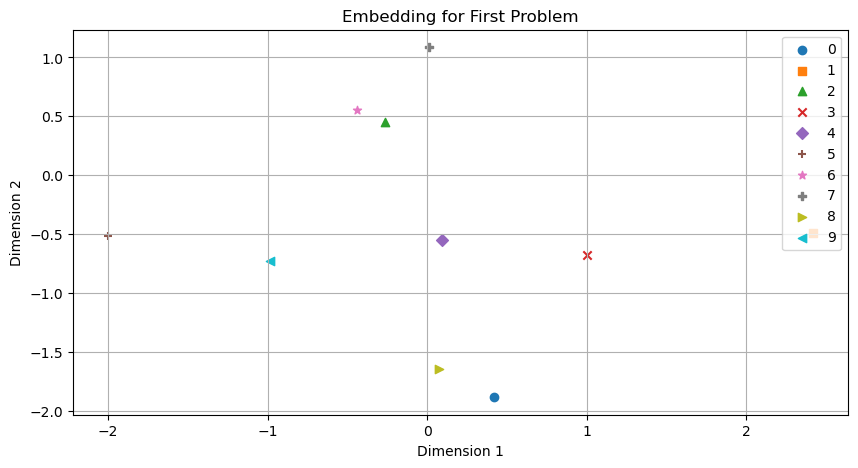

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# Function to generate sequences of integers
def generate_sequence(T):
    return np.random.randint(0, 10, T)

# Function to summarize a sequence
def summarize(seq):
    summary = [0] * 10
    for num in seq:
        summary[num] += 1
    return summary

# Generate training data
X_train = [generate_sequence(np.random.randint(5, 21)) for _ in range(1000)]

# Define 2D embedding for numbers 0 through 9
embedding_matrix = np.random.randn(10, 2)

# Define summary network
summary_model = Sequential([
    Embedding(input_dim=10, output_dim=2, weights=[embedding_matrix], trainable=False),
    LSTM(64),
    Dense(10, activation='relu')
])

# Define query network
query_model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')
])

# Compile summary and query models
summary_model.compile(loss='mse', optimizer='adam')
query_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train summary model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to the maximum length
max_length = max(len(seq) for seq in X_train)
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')

# Train summary model
summary_model.fit(X_train_padded, np.array([summarize(seq) for seq in X_train]), epochs=10, batch_size=32)

# Train query model
# Generate labels for the query model
query_labels = []
for seq in X_train:
    label = 1 if np.random.randint(0, 10) in seq else 0
    query_labels.append(label)

# Train query model
query_model.fit(summary_model.predict(X_train_padded), np.array(query_labels), epochs=10, batch_size=32)


# Evaluation
# Generate test data
X_test = [generate_sequence(np.random.randint(5, 21)) for _ in range(100)]
max_length_test = max(len(seq) for seq in X_test)
X_test_padded = pad_sequences(X_test, maxlen=max_length_test, padding='post')

# Evaluate summary model
summary_predictions = summary_model.predict(X_test_padded)
# Evaluate query model
query_predictions = query_model.predict(summary_predictions)

# Print example results
for i in range(10):
    print("Sequence:", X_test[i])
    print("Summary:", summary_predictions[i])
    print("Probability of occurrence of 5 in the sequence:", query_predictions[i])

import matplotlib.pyplot as plt

# Define markers for each integer
markers = ['o', 's', '^', 'x', 'D', '+', '*', 'P', '>', '<']
embedding_first_problem = summary_model.layers[0].get_weights()[0]

# Plot embeddings for the first problem
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.scatter(embedding_first_problem[i][0], embedding_first_problem[i][1], label=str(i), marker=markers[i])
plt.title('Embedding for First Problem')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()







Training them together could lead to more effective representation learning

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Step 1: Define a New Dataset
num_samples = 1000
seq_length = 20
num_classes = 10  # Number of unique integers in the sequence
sequences = np.random.randint(0, num_classes, size=(num_samples, seq_length))

# Create labels indicating whether q and q + 1 occur next to each other
labels = np.zeros((num_samples, 1))
for i in range(num_samples):
    for j in range(seq_length - 1):
        if sequences[i, j] == sequences[i, j + 1] - 1:
            labels[i] = 1
            break

# Split data into training and test sets
split = int(0.8 * num_samples)
train_sequences, test_sequences = sequences[:split], sequences[split:]
train_labels, test_labels = labels[:split], labels[split:]

# Step 2: Define the Model
inputs = layers.Input(shape=(seq_length,))
x = layers.Embedding(input_dim=num_classes, output_dim=64)(inputs)
x = layers.LSTM(64)(x)  # You can also use other RNN or CNN layers here
outputs = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs, outputs)

# Step 3: Compile the Model
optimizer = optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(train_sequences, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(test_sequences, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
20/20 [==============================] - 8s 92ms/step - loss: 0.5602 - accuracy: 0.8391 - val_loss: 0.5256 - val_accuracy: 0.8062
Epoch 2/10
20/20 [==============================] - 0s 23ms/step - loss: 0.4440 - accuracy: 0.8406 - val_loss: 0.5011 - val_accuracy: 0.8062
Epoch 3/10
20/20 [==============================] - 0s 25ms/step - loss: 0.4456 - accuracy: 0.8406 - val_loss: 0.4914 - val_accuracy: 0.8062
Epoch 4/10
20/20 [==============================] - 0s 24ms/step - loss: 0.4434 - accuracy: 0.8406 - val_loss: 0.4909 - val_accuracy: 0.8062
Epoch 5/10
20/20 [==============================] - 0s 25ms/step - loss: 0.4358 - accuracy: 0.8406 - val_loss: 0.5002 - val_accuracy: 0.8062
Epoch 6/10
20/20 [==============================] - 0s 25ms/step - loss: 0.4350 - accuracy: 0.8406 - val_loss: 0.4900 - val_accuracy: 0.8062
Epoch 7/10
20/20 [==============================] - 0s 25ms/step - loss: 0.4377 - accuracy: 0.8406 - val_loss: 0.4887 - val_accuracy: 0.8062
Epoch 8/10
20

### Q4

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10

# Step 1: Data Preparation
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 2: Define Functions for Building Blocks
def conv_block(x, filters, kernel_size=(3, 3), padding='same', activation='relu'):
    x = layers.Conv2D(filters, kernel_size, padding=padding, activation=activation)(x)
    x = layers.Conv2D(filters, kernel_size, padding=padding, activation=activation)(x)
    x = layers.MaxPooling2D((2, 2))(x)
    return x

def residual_block(x, filters, kernel_size=(3, 3), padding='same', activation='relu'):
    y = layers.Conv2D(filters, kernel_size, padding=padding, activation=activation)(x)
    y = layers.Conv2D(filters, kernel_size, padding=padding, activation=activation)(y)
    x = layers.add([x, y])
    return x

# Step 3: Build the Model
inputs = layers.Input(shape=(32, 32, 3))
x = inputs
x = conv_block(x, 32)
x = conv_block(x, 64)
x = conv_block(x, 128)
for i in range(10):
    x = residual_block(x, 128)
    if i % 2 == 0 and x.shape[1] > 1 and x.shape[2] > 1:  # Add downsampling every 2 residual blocks
        x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10)(x)

model = models.Model(inputs, outputs)

# Step 4: Compile the Model
optimizer = optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


170498071/170498071 [==============================] - 19s 0us/step


Epoch 1/50
1563/1563 [==============================] - 264s 161ms/step - loss: 1.6260 - accuracy: 0.3928 - val_loss: 1.3369 - val_accuracy: 0.5097
Epoch 2/50
1563/1563 [==============================] - 250s 160ms/step - loss: 1.1377 - accuracy: 0.5882 - val_loss: 1.0298 - val_accuracy: 0.6324
Epoch 3/50
1563/1563 [==============================] - 256s 164ms/step - loss: 0.9013 - accuracy: 0.6819 - val_loss: 0.8515 - val_accuracy: 0.7050
Epoch 4/50
1563/1563 [==============================] - 255s 163ms/step - loss: 0.7534 - accuracy: 0.7343 - val_loss: 0.7840 - val_accuracy: 0.7306
Epoch 5/50
1563/1563 [==============================] - 258s 165ms/step - loss: 0.6574 - accuracy: 0.7691 - val_loss: 0.7430 - val_accuracy: 0.7442
Epoch 6/50
1563/1563 [==============================] - 236s 151ms/step - loss: 0.5797 - accuracy: 0.7942 - val_loss: 0.7365 - val_accuracy: 0.7514
Epoch 7/50
1563/1563 [==============================] - 183s 117ms/step - loss: 0.5127 - accuracy: 0.8203 - val_

### Q5

### To test for overfitting, we can split the dataset into training and validation sets. If the loss on the validation set starts increasing while the loss on the training set keeps decreasing, it indicates overfitting.

In [13]:
pip install torchvision

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/c6/75/d869f600fc33df8b8ca99943e165a4ca23b73c68dc1942098fde0a6b46f3/torchvision-0.17.2-cp311-cp311-win_amd64.whl.metadata
  Using cached torchvision-0.17.2-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
Using cached torchvision-0.17.2-cp311-cp311-win_amd64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


Files already downloaded and verified


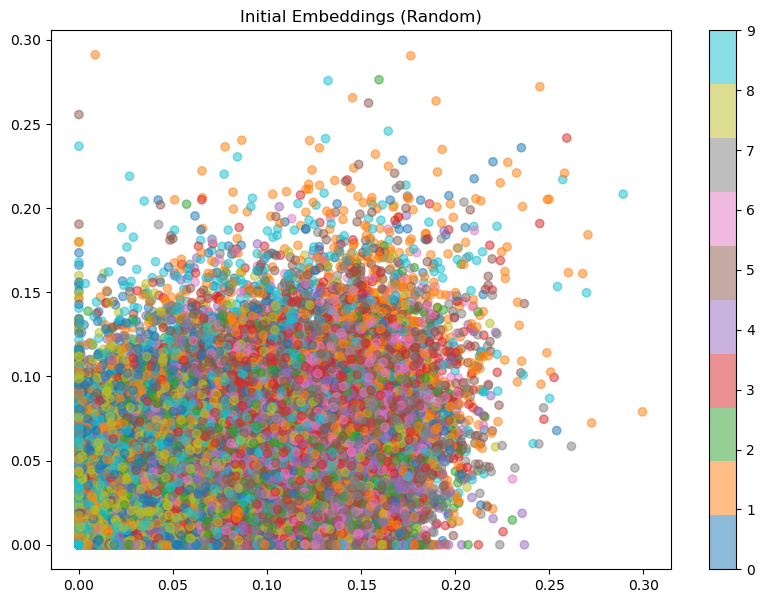

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define transformation for CIFAR dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Define embedding network
class EmbeddingNet(nn.Module):
    def __init__(self):
        super(EmbeddingNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Linear(32 * 8 * 8, 128)  # Assuming input image size is 32x32
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = self.relu(x)
        return x

# Define contrastive loss function
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = nn.functional.pairwise_distance(output1, output2, keepdim=True)
        loss_contrastive = torch.mean((label) * torch.pow(euclidean_distance, 2) +
                                      (1-label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive

# Initialize embedding network and loss function
embedding_net = EmbeddingNet()
criterion = ContrastiveLoss()

# Plot initial embeddings of all images
def plot_embeddings(embeddings, targets, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(embeddings[:,0], embeddings[:,1], c=targets, cmap='tab10', alpha=0.5)
    plt.title(title)
    plt.colorbar()
    plt.show()

# Get initial embeddings
def get_initial_embeddings():
    embeddings = []
    labels = []
    with torch.no_grad():
        for images, targets in trainloader:
            outputs = embedding_net(images)
            embeddings.extend(outputs.numpy())
            labels.extend(targets.numpy())
    return np.array(embeddings), np.array(labels)

# Get initial embeddings and labels
initial_embeddings, labels = get_initial_embeddings()

# Plot initial embeddings
plot_embeddings(initial_embeddings, labels, title="Initial Embeddings (Random)")


### Lower values of M might encourage embeddings to be closer for similar images, while higher values of M might enforce greater separation between dissimilar images.